In [104]:
# Importing Libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [105]:
# Import the data
ba = pd.read_csv("BA.csv")

In [106]:
ba.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2561,3/9/2020,238.000000,241.479996,224.369995,227.169998,227.169998,11585500
2562,3/10/2020,237.000000,237.830002,215.000000,231.009995,231.009995,13059600
2563,3/11/2020,222.990005,226.990005,187.000000,189.080002,189.080002,28503500
2564,3/12/2020,160.529999,189.850006,154.809998,154.839996,154.839996,31734400
2565,3/13/2020,174.970001,178.279999,161.380005,170.199997,170.199997,21168500


In [107]:
ba.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2010,55.720001,56.389999,54.799999,56.180000,43.441975,6186700
1,1/5/2010,56.250000,58.279999,56.000000,58.020000,44.864773,8867800
2,1/6/2010,58.230000,59.990002,57.880001,59.779999,46.225727,8836500
3,1/7/2010,59.509998,62.310001,59.020000,62.200001,48.097031,14379100
4,1/8/2010,61.540001,61.779999,60.860001,61.599998,47.633064,7146600


In [108]:
ba['MA5'] = ba['Adj Close'].rolling(window = 5).mean()
ba['MA20'] = ba['Adj Close'].rolling(window = 20).mean()

In [109]:
ba = ba.dropna()

In [110]:
ba['high'] = ba['MA5'] > ba['MA20']
ba['high_lag'] = ba['high'].shift(1)

In [111]:
ba.dropna(inplace = True)
ba.reset_index(drop = True, inplace = True)

In [112]:
ba.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,high,high_lag
0,2/2/2010,61.290001,62.000000,61.000000,61.939999,47.895981,7862300,47.745969,46.723713,True,True
1,2/3/2010,61.520000,61.799999,60.849998,61.459999,47.849266,5480600,47.738173,46.872938,True,True
2,2/4/2010,60.950001,61.169998,59.250000,59.320000,46.183182,7490700,47.299728,46.870810,True,True
3,2/5/2010,59.209999,59.740002,57.139999,58.400002,45.466930,9675700,47.021152,46.739305,True,True
4,2/8/2010,58.330002,58.970001,57.779999,57.889999,45.069866,4724500,46.493045,46.611145,False,True


In [113]:
ba['Action'] = 0
count = 0
for i, x in ba.iterrows():
    if (x['high'] > x['high_lag']):
        ba.loc[i, 'Action'] = 1
    elif (x['high'] < x['high_lag']):
        ba.loc[i, 'Action'] = -1
        count += 1
    else:
        ba.loc[i, 'Action'] = 0

In [114]:
ba.dropna(inplace = True)
ba.reset_index(drop = True, inplace = True)

In [115]:
ba

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,high,high_lag,Action
0,2/2/2010,61.290001,62.000000,61.000000,61.939999,47.895981,7862300,47.745969,46.723713,True,True,0
1,2/3/2010,61.520000,61.799999,60.849998,61.459999,47.849266,5480600,47.738173,46.872938,True,True,0
2,2/4/2010,60.950001,61.169998,59.250000,59.320000,46.183182,7490700,47.299728,46.870810,True,True,0
3,2/5/2010,59.209999,59.740002,57.139999,58.400002,45.466930,9675700,47.021152,46.739305,True,True,0
4,2/8/2010,58.330002,58.970001,57.779999,57.889999,45.069866,4724500,46.493045,46.611145,False,True,-1
5,2/9/2010,58.619999,60.430000,58.389999,59.740002,46.510170,8250900,46.215883,46.583225,False,False,0
6,2/10/2010,59.709999,60.049999,58.939999,59.540001,46.354473,4237100,45.916924,46.564530,False,False,0
7,2/11/2010,59.750000,60.750000,58.939999,60.590000,47.171928,4395800,46.114673,46.558485,False,False,0
8,2/12/2010,59.869999,59.919998,58.930000,59.650002,46.440113,5178300,46.309310,46.500383,False,False,0
9,2/16/2010,60.419998,61.290001,59.900002,61.259998,47.693565,4268700,46.834050,46.533565,True,False,1


In [122]:
ba['value'] = 0
cash = 100000
quantity = 0
price = 0
for x in range(len(ba)):    
    # Buy
    if (ba.loc[x, 'Action'] == 1):
        price = ba.loc[x, 'Adj Close']
        quantity = cash/price
        cash = 0
    # Sell
    elif (ba.loc[x, 'Action'] == -1):
        if (quantity == 0):
            ba.loc[x, 'value'] = cash + quantity * ba.loc[x, 'Adj Close']
        else:
            cash = ba.loc[x, 'Adj Close'] * quantity
            quantity = 0
    ba.loc[x, 'value'] = cash + quantity * ba.loc[x, 'Adj Close']

In [123]:
ba.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,high,high_lag,Action,value
0,2/2/2010,61.290001,62.000000,61.000000,61.939999,47.895981,7862300,47.745969,46.723713,True,True,0,100000.0
1,2/3/2010,61.520000,61.799999,60.849998,61.459999,47.849266,5480600,47.738173,46.872938,True,True,0,100000.0
2,2/4/2010,60.950001,61.169998,59.250000,59.320000,46.183182,7490700,47.299728,46.870810,True,True,0,100000.0
3,2/5/2010,59.209999,59.740002,57.139999,58.400002,45.466930,9675700,47.021152,46.739305,True,True,0,100000.0
4,2/8/2010,58.330002,58.970001,57.779999,57.889999,45.069866,4724500,46.493045,46.611145,False,True,-1,100000.0


In [124]:
ba.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,high,high_lag,Action,value
2541,3/9/2020,238.000000,241.479996,224.369995,227.169998,227.169998,11585500,262.721994,307.546969,False,False,0,198191.367061
2542,3/10/2020,237.000000,237.830002,215.000000,231.009995,231.009995,13059600,252.799994,301.965895,False,False,0,198191.367061
2543,3/11/2020,222.990005,226.990005,187.000000,189.080002,189.080002,28503500,233.991995,294.300748,False,False,0,198191.367061
2544,3/12/2020,160.529999,189.850006,154.809998,154.839996,154.839996,31734400,212.885996,284.772997,False,False,0,198191.367061
2545,3/13/2020,174.970001,178.279999,161.380005,170.199997,170.199997,21168500,194.459998,276.141997,False,False,0,198191.367061


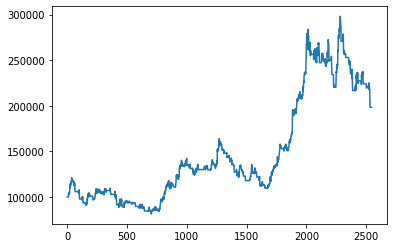

In [125]:
plt.plot(ba['value'])